<a href="https://colab.research.google.com/github/olegkleiman/tf2/blob/master/colab_hint_gauss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Non-linear Least Squares Regression for Gauss3

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/addons/blob/master/docs/tutorials/losses_triplet.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [ ]:
!pip install -U tensorflow-addons

In [ ]:
%load_ext tensorboard

In [80]:
%tensorflow_version 2.x
import tensorflow as tf
import tensorflow_addons as tfa

print("TF version: {}".format(tf.__version__))
device_name = tf.test.gpu_device_name()
print(device_name)

TF version: 2.4.1



In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import files
uploaded = files.upload()

Saving G3TrainData.csv to G3TrainData (1).csv
Saving G3ValidateData.csv to G3ValidateData.csv


## Prepare the data
Read data from uploaded csv files for training and evaluation

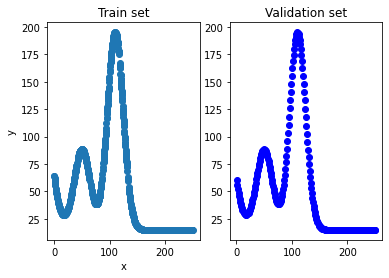

In [67]:
train_set = np.genfromtxt('G3TrainData.csv', delimiter=',', skip_header=True)
validation_set = np.genfromtxt('G3ValidateData.csv', delimiter=',', skip_header=True)

x_train = train_set[:, 0:1]
y_train = train_set[:, 1:2]

x_validation = validation_set[:, 0:1]
y_validation = validation_set[:, 1:2]

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Train set')
plt.xlabel('x')
plt.ylabel('y')
ax.scatter(x_train, y_train)

ax = fig.add_subplot(1, 2, 2)
ax.set_title('Validation set')
ax.scatter(x_validation, y_validation, color='blue')


Prepare and train the model

In [48]:
from tensorflow import keras

def create_model():
  return keras.Sequential([
    keras.layers.Dense(50, input_dim=1, activation=tf.nn.relu),
    keras.layers.Dense(100, kernel_initializer="glorot_uniform", activation=tf.nn.relu),
    keras.layers.Dense(100, kernel_initializer="glorot_uniform", activation=tf.nn.relu),
    keras.layers.Dense(100, kernel_initializer="glorot_uniform", activation=tf.nn.relu),
    keras.layers.Dense(1, kernel_initializer="glorot_uniform", activation=None)                           
  ])

model = create_model()
model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adam())
              # metrics=["mae", "acc"])
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=200,
          verbose=False)
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 50)                100       
_________________________________________________________________
dense_86 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_87 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_88 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_89 (Dense)             (None, 1)                 101       
Total params: 25,501
Trainable params: 25,501
Non-trainable params: 0
_________________________________________________________________


Make and display predictions

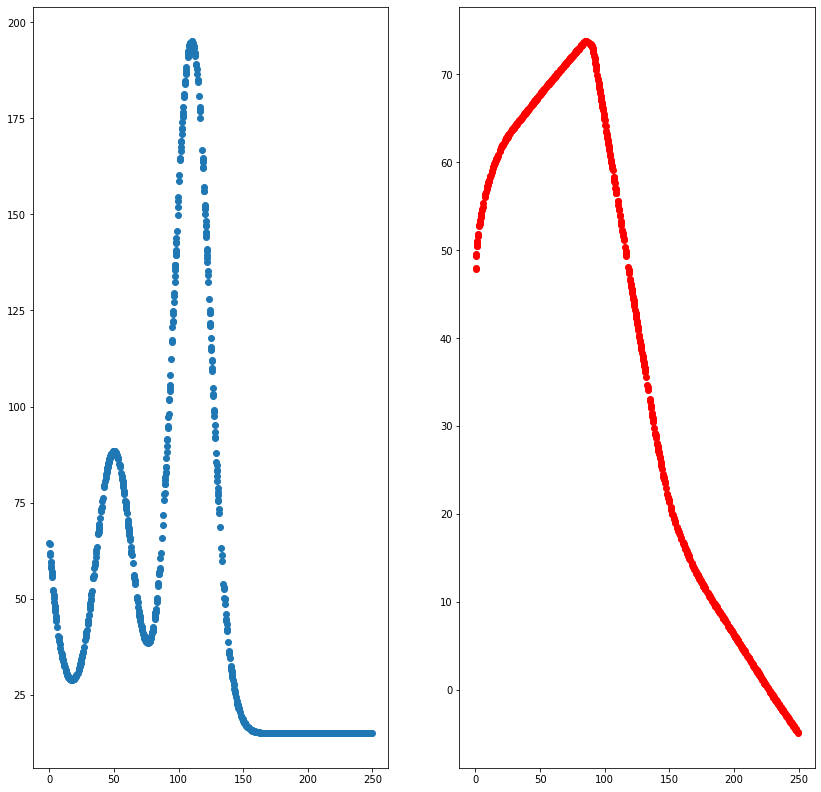

In [82]:
y_predicted = model.predict(x_train)

metric = tfa.metrics.r_square.RSquare()
# metric.update_state(y_train, y_predicted)
# result = metric.result()
# print('R^2 Score: {}'.format(resuls.numpy()))

figure = plt.figure(figsize=(14, 14))
ax = figure.add_subplot(1, 2, 1)
ax.scatter(x_train, y_train)

ax = figure.add_subplot(1, 2, 2)
ax.scatter(x_train, y_predicted, color='red')

# y_validation_predicted = model.predict(x_validation)
# ax = figure.add_subplot(2, 2, 1)
# ax.scatter(x_validation, y_validation_predicted, color='blue')

# ax = figure.add_subplot(2, 2, 2)
# ax.scatter(x_validation, y_validation_predicted, color='red')

